In [213]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os as os
import numpy as np
import math
import stats


Socioeconomic Data:
Population:API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv
https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

Urban Population    
https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS?view=chart

Dengue Incidence Data:dengue-incidence.csv
https://ourworldindata.org/grapher/dengue-incidence?tab=table

healthcare-access:HealthcareAccessAndQuality data.csv    
https://ourworldindata.org/grapher/healthcare-access-and-quality-index?tab=table
    
surface temperature:Annual_Surface_Temperature_Change.csv
https://climatedata.imf.org/pages/climatechange-data
    
Forst Area :API_AG.LND.FRST.ZS_DS2_en_csv_v2_5994693.csv
https://data.worldbank.org/indicator/AG.LND.FRST.ZS?end=2017&start=1990&view=chart

In [248]:
worldbank_POP_TOTL_file = "API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv"
dengueIncidence_file = "/Users/jahbar/Documents/GitHub/UN_ADS1_Assignment2/dengue_incidence_processed.csv"
surface_temperature_file_PH ="/Users/jahbar/Documents/GitHub/UN_ADS1_Assignment2/Annual_Surface_Temperature_Change_PH.csv"

In [119]:
def processWorldbank_POP_TOT(filename):
    df_worldbank = pd.read_csv(filename,skiprows=3)
    #data cleanning
    #Country Code is needed for future processing
    df_Bycountry_pop = df_worldbank.loc[:, ~df_worldbank.columns.isin(['Indicator Code', 'Indicator Name'])]

    #removing 'Indicator Code', 'Indicator Name','Country Code'
    df_ByYear_pop = df_worldbank.loc[:, ~df_worldbank.columns.isin(['Indicator Code', 'Indicator Name','Country Code'])]
    df_ByYear_pop = df_ByYear_pop.transpose()
    df_ByYear_pop.reset_index(drop=False, inplace=True)
    df_ByYear_pop.columns = df_ByYear_pop.iloc[0]
    # Drop the first row as it's now used for column names
    df_ByYear_pop = df_year_pop[1:]
    #rename column
    df_ByYear_pop = df_ByYear_pop.rename(columns={'Country Name':'Year'})
    #cleaning: removing last row 
    df_ByYear_pop.drop(df_ByYear_pop.index[-1], inplace=True)
    df_ByYear_pop = df_ByYear_pop.set_index('Year')
    # Changing the index to integers
    df_ByYear_pop.index = df_ByYear_pop.index.astype(int)
    return df_Bycountry_pop,df_ByYear_pop

In [122]:
pop_byCountry,pop_byYear = processWorldbank_POP_TOT(worldbank_POP_TOTL_file)
#display (pop_byCountry,pop_byYear)

In [167]:
def processDengueIncidence(filename):
    df_dengueIncidence = pd.read_csv(filename)
    df_dengueIncidence = df_dengueIncidence.set_index('Years')
    
    return df_dengueIncidence.round()

In [179]:
df_dengueIncidence = processDengueIncidence(dengueIncidence_file)

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Yemen,Zambia,Zimbabwe
Years,,,,,,,,,,,,,,,,,,,,,
1990,23371.0,0,0,937.0,0,52139.0,441.0,74963.0,0,37611.0,...,1068.0,0,0,1930.0,199913.0,812956.0,0,41846.0,35903.0,33317.0
1991,25794.0,0,0,979.0,0,53994.0,464.0,76019.0,0,38198.0,...,1124.0,0,0,1969.0,224463.0,839878.0,0,43177.0,36556.0,34417.0
1992,29766.0,0,0,1025.0,0,56005.0,491.0,77030.0,0,38709.0,...,1181.0,0,0,2027.0,244647.0,865347.0,0,44550.0,37252.0,35420.0
1993,32711.0,0,0,1075.0,0,58137.0,521.0,77990.0,0,39167.0,...,1240.0,0,0,2102.0,260563.0,889060.0,0,45972.0,37993.0,36302.0
1994,34268.0,0,0,1128.0,0,60408.0,553.0,78920.0,0,39586.0,...,1297.0,0,0,2192.0,272395.0,910489.0,0,47447.0,38782.0,37055.0
1995,35823.0,0,0,1182.0,0,62846.0,587.0,79825.0,0,39992.0,...,1353.0,0,0,2294.0,280411.0,929083.0,0,48988.0,39614.0,37676.0
1996,37397.0,0,0,1256.0,0,65507.0,628.0,80673.0,0,40315.0,...,1419.0,0,0,2454.0,278484.0,942151.0,0,50669.0,40601.0,38134.0
1997,38862.0,0,0,1358.0,0,68456.0,678.0,81456.0,0,40524.0,...,1500.0,0,0,2687.0,264599.0,949277.0,0,52511.0,41838.0,38448.0
1998,39660.0,0,0,1470.0,0,71679.0,731.0,82229.0,0,40700.0,...,1581.0,0,0,2948.0,245573.0,953422.0,0,54450.0,43289.0,38680.0


In [186]:
df_DengueIncidence = processDengueIncidence(dengueIncidence_file)
growth_ratesList=[]

# Calculate growth rates for each country
for column_name, column_data in df_DengueIncidence.iteritems():
    data = []
    data.append(column_name)
    if (column_data.iloc[-1] - column_data.iloc[0]) == 0 : continue
        
    absolute_change = column_data.iloc[-1] - column_data.iloc[0]
    growth_rates = (column_data.iloc[-1] - column_data.iloc[0]) / column_data.iloc[0] * 100
    
    data.append((round(growth_rates,2)))
    data.append((round(absolute_change,2)))
    
    growth_ratesList.append(data)

# Create the pandas DataFrame 
df_growth_rates = pd.DataFrame(growth_ratesList, columns=['Country', 'growth_rates%' ,'absolute_change'])
df_growth_rates = df_growth_rates.sort_values(['absolute_change','growth_rates%'],ascending=False)

# Select the top 5 countries with the highest values
top_5_countries = df_growth_rates.head(5)

# Display the top 5 countries
print(top_5_countries)

        Country  growth_rates%  absolute_change
52        India          70.23       11548394.0
22        China         291.22        4538403.0
91  Philippines         367.46        1440655.0
13       Brazil         101.29        1073236.0
84     Pakistan         118.14         829716.0


In [193]:
#df_DengueIncidence[top_5_countries['Country']]

'China'

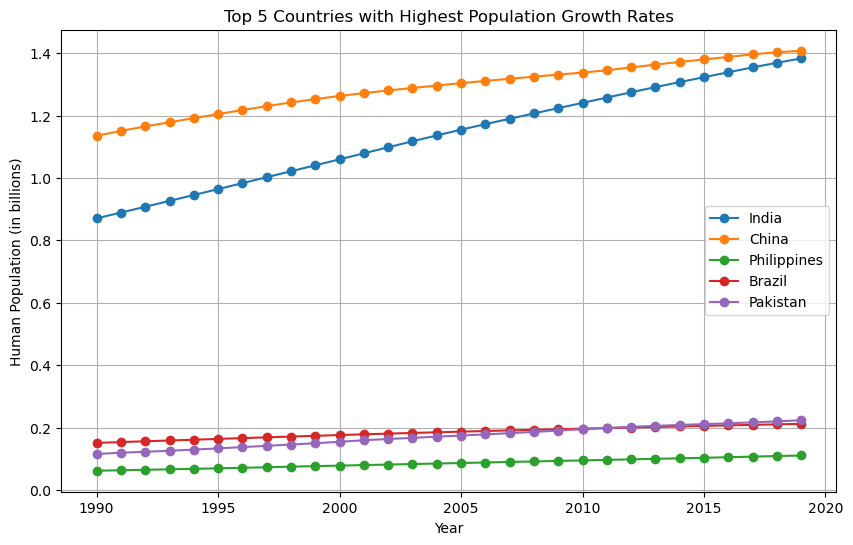

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Example data: Years and Population for multiple countries

years = pop_byYear.index
country_names = pop_byYear.columns
population_data = pop_byYear.div(math.pow(10,9))

# Filter the DataFrame based on the index range
filtered_df = population_data[(population_data.index >= 1990) & (population_data.index <= 2019)]
filtered_df = filtered_df[top_5_countries['Country']]

display(filtered_df.columns[1])



# Plotting the top 5 countries with highest growth rates
plt.figure(figsize=(10, 6))
for i in range(5):
    j = i+1
    plt.plot(filtered_df.index, filtered_df.iloc[:, [i]], marker='o', linestyle='-', label=filtered_df.columns[i])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Human Population (in billions)')
plt.title('Population Growth Rates')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()


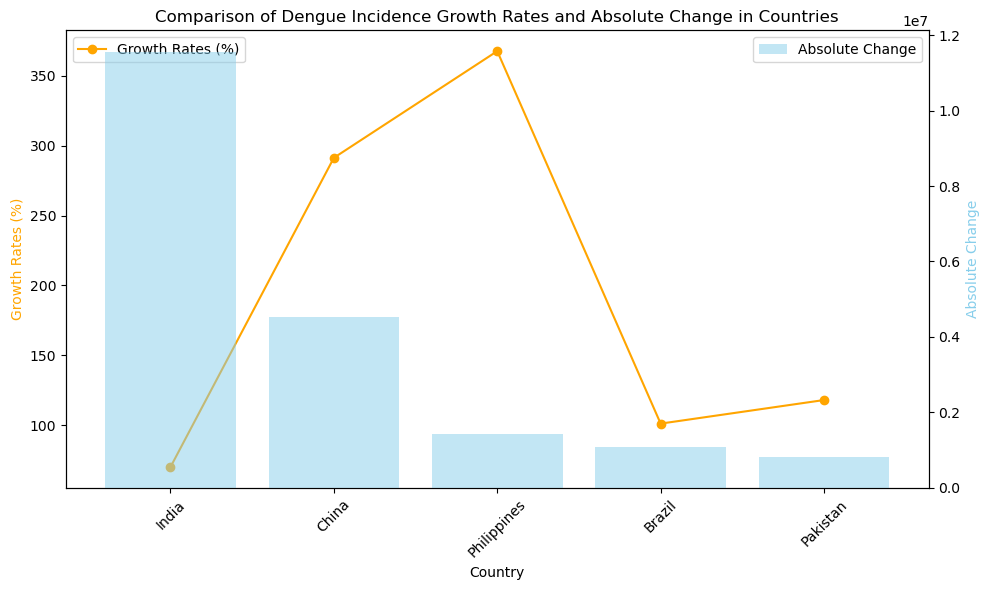

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

#

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'growth_rates%' as a line plot
ax1.plot(top_5_countries['Country'], top_5_countries['growth_rates%'], marker='o', linestyle='-', color='orange', label='Growth Rates (%)')
ax1.set_xlabel('Country')
ax1.set_ylabel('Growth Rates (%)', color='orange')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a secondary y-axis for 'absolute_change'
ax2 = ax1.twinx()
ax2.bar(top_5_countries['Country'], top_5_countries['absolute_change'], color='skyblue', alpha=0.5, label='Absolute Change')
ax2.set_ylabel('Absolute Change', color='skyblue')
ax2.legend(loc='upper right')

# Set title
plt.title('Comparison of Dengue Incidence Growth Rates and Absolute Change in Countries')

# Show the plot
plt.tight_layout()
plt.show()

Comparative Analysis:

Inida has high absolute change but a relatively lower growth rate of 70% while china and philippines has higher growth rates but lower absolute changes, this shows the magnitude of dengee infaction    



In [232]:
#combin the data by top 5 countries

# Filter the DataFrame based on the index range
filtered_df = population_data[(population_data.index >= 1990) & (population_data.index <= 2019)]
filtered_df = filtered_df[top_5_countries['Country']]

#take two contries for feather analisist
master_China = filtered_df[['China']].copy()
master_China.columns=['China_pop']

master_Philippines = filtered_df[['Philippines']].copy()
master_Philippines.columns=['Philippines_pop']


In [255]:
df_surface_temperature_PH = pd.read_csv(surface_temperature_file_PH)
#droping columns
df_surface_temperature_PH.drop(df_surface_temperature_PH.iloc[:, 0:9], axis=1, inplace=True)
df_surface_temperature_PH = df_surface_temperature_PH.transpose()
df_surface_temperature_PH.index = df_surface_temperature_PH.index.astype(int)
df_surface_temperature_PH = df_surface_temperature_PH[(df_surface_temperature_PH.index >= 1990) & (df_surface_temperature_PH.index <= 2019)]

df_surface_temperature_PH.columns = ['PH_surface_temp']
master_Philippines. = df_surface_temperature_PH

,PH_surface_temp
1990,0.412
1991,0.359
1992,0.379
1993,0.385
1994,0.501
1995,0.528
1996,0.427
1997,0.489
1998,1.322
1999,0.561
